  
**Minería de datos**  
Equipo 09 Grupo 003 Viernes 6:00 pm a 9:00 pm  
Integrantes:

- Patricia García Olmeda 1931549
- Lindsey Zugey Alejandro Castillo 1676950
- Jorge Adrian Gonzalez Peña 1821695

# Base de datos  
### 1) *Conjunto de datos de delitos de San Francisco*  
URL: https://www.kaggle.com/roshansharma/sanfranciso-crime-dataset

### 2) Descripción de los datos  
Nuesta base de datos se conforma por un total de 13 columnas y 150,500 registros. En las columnas podemos encontrar el número de incidente, la categoría del crimen sucedido, su descripción, el día de la semana en que ocurrió, feha, hora, distrito, el tipo de solución o castigo que se le dio, dirección y latitud del lugar donde se cometió el delito. Contamos con tres graficas las cuales nos muestran la frecuencia de los tiempos sucecididos, frecuencia el las fechas sucedidas y las latitudes de los crímenes. Entre los tipos de datos que conforman nuestra base de datos encontramos: string, date, int, time y float.

### 3) Justificación del uso de datos  
Lo que más llamó nuestra atención fue el orden de los datos ya que nos ayuda a tener una mejor visualización de estos y poder llegar a una mejor resolución del problema. Estos datos nos parecieron útiles ya que podemos categorizar las zonas y los tiempos para poder encontrar patrones de crímenes en deterinados días de la semana (por ejemplo) y poder obtener buenas conclusiones. En general, la base de datos *Conjunto de datos de delitos de San Francisco* nos convenció por su nivel de detalle, por su especificidad y suficiencia en información.     

El beneficio que vemos es como mencionamos antes, el orden de los datos, esto nos ayuda a depurar los datos que no creemos tan útiles fácilmente y tener una mejor visualización de los datos que pensamos que tienen prioridad para la solución al problema planteado. Y como la base de datos es definida a una sola ciudad, la información obtenida es concreta.

### 4) Objetivos  
Nuestro objetivo principal es poder definir qué días podemos considerar como los más "peligrosos" en la ciudad de San Francisco, es decir, se definen los días en los que los crímenes son mas propensos a ocurrir. Investigaremos los tipos de crímenes, su frecuencia durante la semana y su tipo de resolución, con la finalidad de poder llegar a una mejor conclusión y lograr identificar los barrios donde es necesario que se aumente la seguridad.

#### Objetivo Secundario
   Categorizar el tipo de crimen para poder encontrar cual de estos es mas frecuente y que dia es el que ocurre mayormente.
    


# Desarrollo de las herramientas

### 1) Limpieza de los datos

In [1]:
import pandas as pd

In [2]:
from pandas import Series
import pandas as pd
import numpy as np
import json
import xlrd
import xlwt
import seaborn as sns

 

In [29]:
df = pd.read_excel("Police_Department_2016.xlsx")
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30:00,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01:00,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [30]:
df.columns
df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

In [31]:
df.drop(['IncidntNum','Address', 'X', 'Y', 'Location', 'PdId'], axis = 1, inplace = True)

In [32]:
df[(df.Category == 'LARCENY/THEFT') & (df.Resolution == 'NONE') & (df.PdDistrict == 'INGLESIDE')]

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution
32,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Tuesday,02/16/2016 12:00:00 AM,12:40:00,INGLESIDE,NONE
73,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Tuesday,01/05/2016 12:00:00 AM,19:30:00,INGLESIDE,NONE
309,LARCENY/THEFT,EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY ...,Monday,01/11/2016 12:00:00 AM,14:38:00,INGLESIDE,NONE
400,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Wednesday,01/13/2016 12:00:00 AM,10:09:00,INGLESIDE,NONE
448,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,04/11/2016 12:00:00 AM,15:30:00,INGLESIDE,NONE
...,...,...,...,...,...,...,...
149853,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,11/02/2016 12:00:00 AM,23:10:00,INGLESIDE,NONE
149884,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,12/17/2016 12:00:00 AM,15:55:00,INGLESIDE,NONE
149953,LARCENY/THEFT,PETTY THEFT BICYCLE,Friday,09/30/2016 12:00:00 AM,09:30:00,INGLESIDE,NONE
150059,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,01/11/2016 12:00:00 AM,18:00:00,INGLESIDE,NONE


Aplicamos determinados filtros a nuestra base de datos para centrarnos en la problemática de ¿por qué sucede el tipo delincuencia en ciertos días, a cierta hora, en cierto distrito?. Acotando nuestros datos podemos obtener infromación más exacta. Por ejemplo, aquí estamos trabajando solo con el tipo de crimen más frecuente y no resuelto en el distrito de INGLESIDE, uno de los más pequeños en San Francisco.

In [121]:
df.DayOfWeek.unique()

array(['Friday', 'Monday', 'Tuesday', 'Saturday', 'Thursday', 'Sunday',
       'Wednesday'], dtype=object)

In [122]:
df.Time.unique()

array([datetime.time(11, 0), datetime.time(14, 59), datetime.time(23, 50),
       ..., datetime.time(6, 1), datetime.time(1, 48),
       datetime.time(5, 59)], dtype=object)

In [123]:
df.Resolution.unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [85]:
subdf = pd.ExcelWriter('Police_D2016_filter.xlsx', engine = 'xlsxwriter')
df.to_excel(subdf)
subdf.save()
subdf = pd.read_excel("Police_D2016_filter.xlsx")

In [52]:
subdf.isnull()

,Unnamed: 0,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
150495,False,False,False,False,False,False,False,False
150496,False,False,False,False,False,False,False,False
150497,False,False,False,False,False,False,False,False
150498,False,False,False,False,False,False,False,False


In [53]:
subdf.isnull().any()

Unnamed: 0    False
Category      False
Descript      False
DayOfWeek     False
Date          False
Time          False
PdDistrict     True
Resolution    False
dtype: bool

In [54]:
subdf.isnull().sum()

Unnamed: 0    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
dtype: int64

### 2) Estadística básica de los datos

In [124]:
df.shape

(150500, 7)

In [129]:
df.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution'],
      dtype='object')

In [128]:
df.dtypes

Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
dtype: object

In [133]:
data= {'Category': [df.Category],
    'Day Of Week':[df.DayOfWeek],
       'Time':[df.Time]}
df2=pd.DataFrame(data,columns=['Category','Day Of Week','Time'])
df2

,Category,Day Of Week,Time
0,0 WEAPON LAWS 1 WEAPON L...,0 Friday 1 Friday 2 ...,0 11:00:00 1 11:00:00 2 ...


Para una mejor comprensión y manipulación de los datos decidimos analizar nuestra basa de datos, obtuvimos las dimensiónes de nuestros datos, la cual, como podemos notar es bastante amplia, lo que nos ayuda a poder obtener mejores resultados; obtivimos el tipo de dato de cada categoría para tener una mejor visión de como podemos aprovecharlos en futuras operaciones o gráficos. 

### 3) Gráficas

In [119]:
import matplotlib.pyplot as mpp
import numpy as np
import pandas as pd
import seaborn as sbr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

**Gráfica 1**

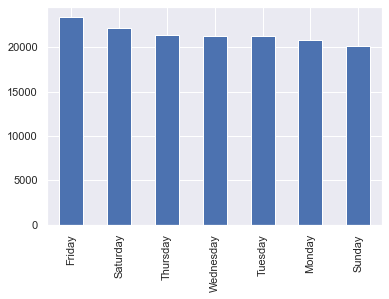

In [73]:
subdf['DayOfWeek'].value_counts().plot.bar()


La gráfica nos dice que el mayor número de delitos no resueltos en el distrito de INGLESIDE suceden los días viernes.


**Gráfica 2**

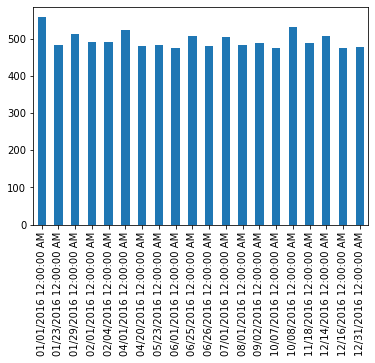

In [14]:
subdf['Date'].value_counts().head(20).sort_index().plot.bar()

La gráfica nos indica el comportamiento de los delitos de las primeras 20 muestras (de nuestra base de datos filtrada) del distrito de INGLESIDE en diferentes fechas. Observamos que la mayoría de los delitos cometidos (dentro de la muestra) han sucedido el 01 de enero de 2016.

**Gráfica 3**

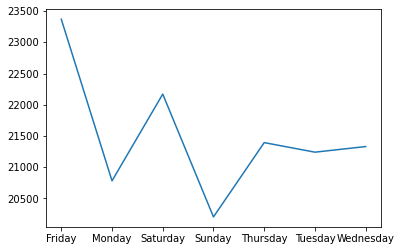

In [15]:
subdf['DayOfWeek'].value_counts().sort_index().plot.line()

Esta gráfica (al igual que la gráfica 1) nos muestra el comportamiento del número de delitos cometidos en la semana en el distrito INGLESIDE. Es una vista diferente de los mismos datos.

**Gráfica 4**

Text(0.5, 0.98, 'Distribución de crimen por día')

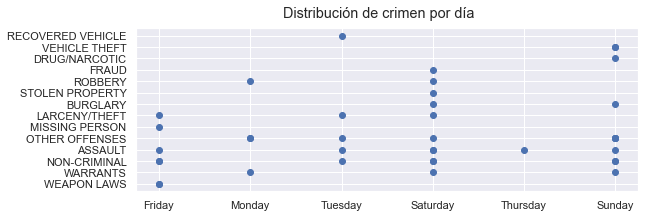

In [116]:
fig, axs = mpp.subplots(1, figsize=(9, 3), sharey=True)
axs.scatter(df['DayOfWeek'].head(40), df['Category'].head(40))
fig.suptitle('Distribución de crimen por día')


Utilizando la base de datos original con 40 muestras, obtuvimos que tipo de delitos son mas frecuentes en los días de la semana, y como podemos observar los días Sábado son los días en los que ocurre más variedad de crímenes realizados. 

## Conclusión

Despues de ver el resultado de nuestros datos y hacer un poco de investigación podemos decir lo siguiente.
Con ayuda de las graficas podemos decir que los fines de semana, especificamente los días Viernes y Sabado son los días en que mas ocurren delitos, decidimos realizar una investigación para poder entender el por qué de este fenómeno, obteniendo la siguiente información:

"De acuerdo con un estudio realizado en la Universidad de Arizona y la Universidad de Purdue, las agresiones y los asaltos aumentan los dias viernes y sabado, este fenómeno se puede explicar señalando que estos días son los que la gente suele salir mas a la calle, del mismo modo se destaca que es probable que el alcohol esté involucrado, lo cual, puede aumentar el riego de agresión".

Fuente: https://www.elespanol.com/ciencia/investigacion/20181218/dias-calendario-crimenes-violentos/352715069_0.html

Gracias a esto tenemos una mejor compresión del por qué de este fenómeno de crímenes durante el fin de semana.

Así mismo obtuvimos una mejor visualización de los delitos mas frecuentes, realizamos un gráfico con la distribución de crímenes por día y a pesar de que obtuvimos como resultado el día Viernes como el dia mas propenso a sufrir un crimen, notamos que el día Sabado es el día con mas variedad de crimen, haciendolo también un día considerable como "peligroso" en la ciudad de San Francisco. Por lo tanto, es necesario aumentar la seguridad ese día para mejorar la tranquilidad de los ciudadanos y reducir la tasa de delitos.